### Tf2.0 Linear Regression Models

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import tensorflow as tf
import tensorflow.keras as K
import time

In [6]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.layers import Embedding, LSTM
from tensorflow.keras.optimizers import RMSprop
# from tf.K.preprocessing import sequence

In [2]:
data = pd.read_csv('./data/real_estate_price_size_year.csv')

In [3]:
print(data.shape)

(100, 3)


In [4]:
np.random.seed(42)
observations = 1000
xs = np.random.uniform(low=-10, high=10, size=(observations, 1))
zs = np.random.uniform(-10, 10, (observations, 1))
gen_inputs=np.column_stack((xs,zs))
noise=np.random.uniform(-1,1, (observations,1))
gen_targets= 2*xs - 3*zs +5+noise
np.savez('tf_intro', inputs=gen_inputs, targets=gen_targets)

In [5]:
train=np.load('tf_intro.npz')

In [6]:
input_size=2
output_size=1

model=K.Sequential([
                        K.layers.Dense(output_size)
                ])

model.compile(
            optimizer='sgd',
            loss='mean_squared_error'
)

model.fit(train['inputs'], train['targets'], epochs=100, verbose=2)


Train on 1000 samples
Epoch 1/100
1000/1000 - 1s - loss: 33.0494
Epoch 2/100
1000/1000 - 0s - loss: 4.5566
Epoch 3/100
1000/1000 - 0s - loss: 1.4957
Epoch 4/100
1000/1000 - 0s - loss: 0.6776
Epoch 5/100
1000/1000 - 0s - loss: 0.4358
Epoch 6/100
1000/1000 - 0s - loss: 0.3745
Epoch 7/100
1000/1000 - 0s - loss: 0.3492
Epoch 8/100
1000/1000 - 0s - loss: 0.3575
Epoch 9/100
1000/1000 - 0s - loss: 0.3477
Epoch 10/100
1000/1000 - 0s - loss: 0.3482
Epoch 11/100
1000/1000 - 0s - loss: 0.3548
Epoch 12/100
1000/1000 - 0s - loss: 0.3456
Epoch 13/100
1000/1000 - 0s - loss: 0.3503
Epoch 14/100
1000/1000 - 0s - loss: 0.3534
Epoch 15/100
1000/1000 - 0s - loss: 0.3451
Epoch 16/100
1000/1000 - 0s - loss: 0.3498
Epoch 17/100
1000/1000 - 0s - loss: 0.3575
Epoch 18/100
1000/1000 - 0s - loss: 0.3587
Epoch 19/100
1000/1000 - 0s - loss: 0.3560
Epoch 20/100
1000/1000 - 0s - loss: 0.3439
Epoch 21/100
1000/1000 - 0s - loss: 0.3550
Epoch 22/100
1000/1000 - 0s - loss: 0.3474
Epoch 23/100
1000/1000 - 0s - loss: 0.34

In [7]:
model.layers[0].get_weights()

array([4.9999275], dtype=float32)

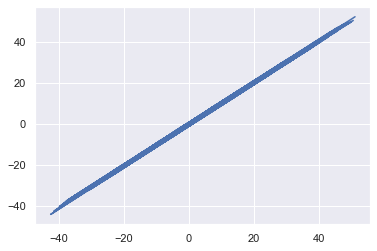

In [8]:
plt.plot(np.squeeze(model.predict_on_batch(train['inputs'])), np.squeeze(train['targets']))
plt.show()

In [9]:
model=K.Sequential([
            K.layers.Dense(output_size,
                        kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
                        bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1)
                            )
                ])

optim=K.optimizers.SGD(learning_rate=0.01)

model.compile(
            optimizer=optim,
            loss='mean_squared_error'
)

model.fit(train['inputs'], train['targets'], epochs=100, verbose=2)


Train on 1000 samples
Epoch 1/100
1000/1000 - 0s - loss: 29.7688
Epoch 2/100
1000/1000 - 0s - loss: 4.7612
Epoch 3/100
1000/1000 - 0s - loss: 1.5214
Epoch 4/100
1000/1000 - 0s - loss: 0.6653
Epoch 5/100
1000/1000 - 0s - loss: 0.4388
Epoch 6/100
1000/1000 - 0s - loss: 0.3734
Epoch 7/100
1000/1000 - 0s - loss: 0.3570
Epoch 8/100
1000/1000 - 0s - loss: 0.3533
Epoch 9/100
1000/1000 - 0s - loss: 0.3498
Epoch 10/100
1000/1000 - 0s - loss: 0.3506
Epoch 11/100
1000/1000 - 0s - loss: 0.3492
Epoch 12/100
1000/1000 - 0s - loss: 0.3419
Epoch 13/100
1000/1000 - 0s - loss: 0.3511
Epoch 14/100
1000/1000 - 0s - loss: 0.3525
Epoch 15/100
1000/1000 - 0s - loss: 0.3469
Epoch 16/100
1000/1000 - 0s - loss: 0.3459
Epoch 17/100
1000/1000 - 0s - loss: 0.3497
Epoch 18/100
1000/1000 - 0s - loss: 0.3484
Epoch 19/100
1000/1000 - 0s - loss: 0.3462
Epoch 20/100
1000/1000 - 0s - loss: 0.3527
Epoch 21/100
1000/1000 - 0s - loss: 0.3455
Epoch 22/100
1000/1000 - 0s - loss: 0.3520
Epoch 23/100
1000/1000 - 0s - loss: 0.35

In [10]:
model.layers[0].get_weights()

[array([[ 2.020059 ],
        [-2.9817238]], dtype=float32), array([5.0088415], dtype=float32)]

In [11]:
model=K.Sequential([
            K.layers.Dense(output_size,
                        kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
                        bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1)
                            )
                ])

optim=K.optimizers.SGD(learning_rate=0.005)

model.compile(
            optimizer=optim,
            loss='huber_loss'
)

model.fit(train['inputs'], train['targets'], epochs=100, verbose=2)

Train on 1000 samples
Epoch 1/100
1000/1000 - 0s - loss: 15.0162
Epoch 2/100
1000/1000 - 0s - loss: 11.6466
Epoch 3/100
1000/1000 - 0s - loss: 8.4938
Epoch 4/100
1000/1000 - 0s - loss: 5.9230
Epoch 5/100
1000/1000 - 0s - loss: 4.4267
Epoch 6/100
1000/1000 - 0s - loss: 4.0492
Epoch 7/100
1000/1000 - 0s - loss: 3.8813
Epoch 8/100
1000/1000 - 0s - loss: 3.7314
Epoch 9/100
1000/1000 - 0s - loss: 3.5752
Epoch 10/100
1000/1000 - 0s - loss: 3.4247
Epoch 11/100
1000/1000 - 0s - loss: 3.2758
Epoch 12/100
1000/1000 - 0s - loss: 3.1228
Epoch 13/100
1000/1000 - 0s - loss: 2.9715
Epoch 14/100
1000/1000 - 0s - loss: 2.8195
Epoch 15/100
1000/1000 - 0s - loss: 2.6658
Epoch 16/100
1000/1000 - 0s - loss: 2.5160
Epoch 17/100
1000/1000 - 0s - loss: 2.3666
Epoch 18/100
1000/1000 - 0s - loss: 2.2118
Epoch 19/100
1000/1000 - 0s - loss: 2.0611
Epoch 20/100
1000/1000 - 0s - loss: 1.9101
Epoch 21/100
1000/1000 - 0s - loss: 1.7604
Epoch 22/100
1000/1000 - 0s - loss: 1.6115
Epoch 23/100
1000/1000 - 0s - loss: 1.4

In [12]:
model.layers[0].get_weights()

[array([[ 2.0114617],
        [-2.9996648]], dtype=float32), array([5.005081], dtype=float32)]